In [1]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import pandas_datareader as web

from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<IPython.core.display.Javascript object>

In [2]:
# Pricing data of NVDA
pricing_data = web.DataReader("NVDA", "yahoo")

<IPython.core.display.Javascript object>

In [3]:
df = pricing_data[["Close"]]

<IPython.core.display.Javascript object>

In [4]:
df.describe()

,Close
count,1259.000000
mean,112.322712
std,73.495699
min,31.770000
25%,52.922501
50%,73.434998
75%,154.830002
max,333.760010


<IPython.core.display.Javascript object>

In [5]:
# train, test = pd.Series(
#     train_test_split(df.dropna(), test_size=0, random_state=None, shuffle=False)
# )
# df = train

<IPython.core.display.Javascript object>

In [6]:
result = adfuller(df.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value:{result[1]}")

ADF Statistic: -1.2493704659870368
p-value:0.6520056803159615


<IPython.core.display.Javascript object>

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

<IPython.core.display.Javascript object>

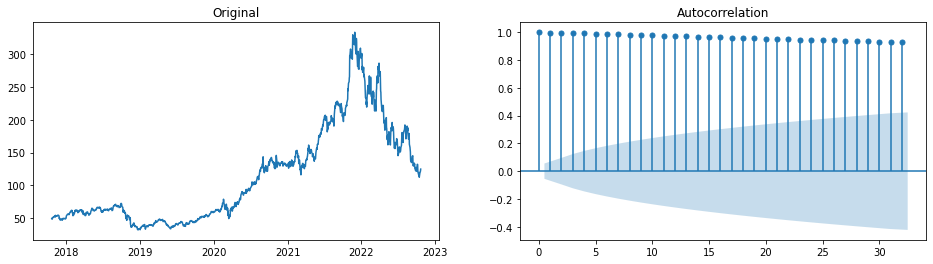

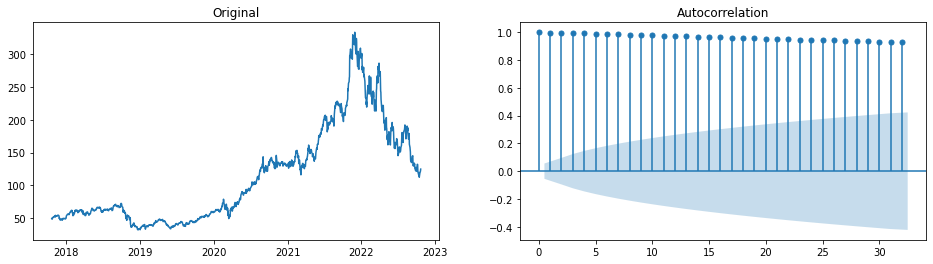

<IPython.core.display.Javascript object>

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df)
ax1.set_title("Original")

plot_acf(df, ax=ax2)

# Determine d

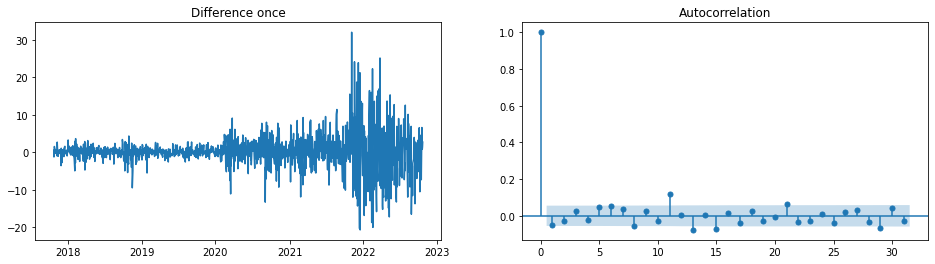

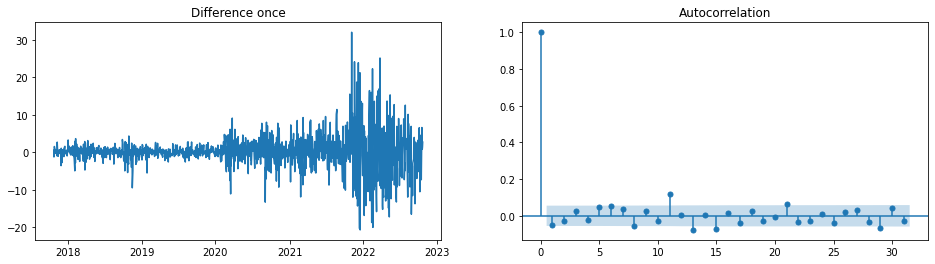

<IPython.core.display.Javascript object>

In [9]:
diff = df.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2)

In [10]:
from pmdarima.arima.utils import ndiffs

<IPython.core.display.Javascript object>

In [11]:
ndiffs(df, test="adf")

1

<IPython.core.display.Javascript object>

# Determine p

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

<IPython.core.display.Javascript object>

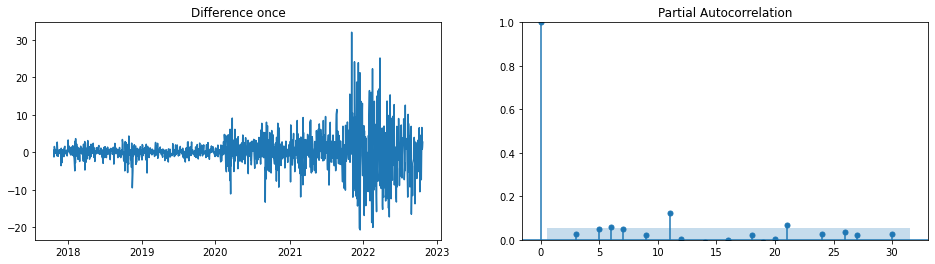

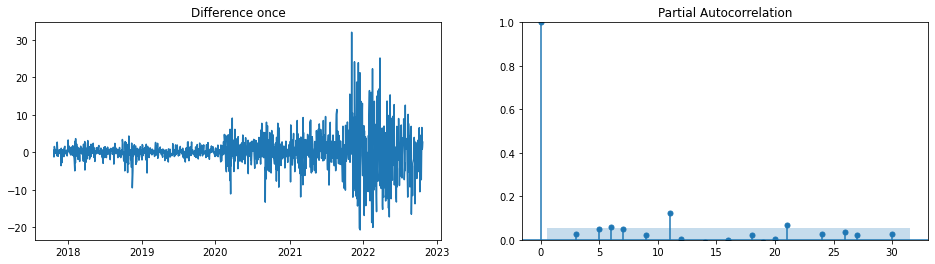

<IPython.core.display.Javascript object>

In [13]:
diff = df.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2)

PACF lag 11 is significant as it's above the significance line

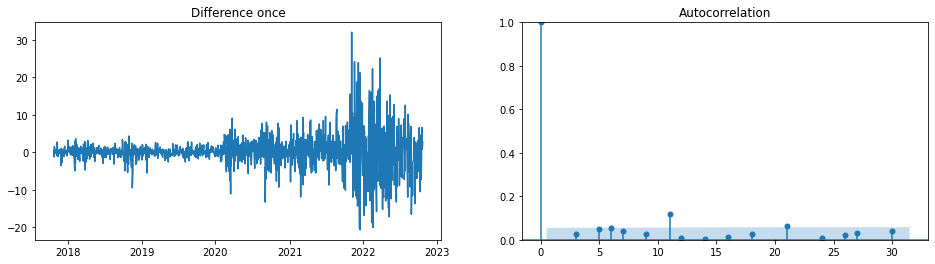

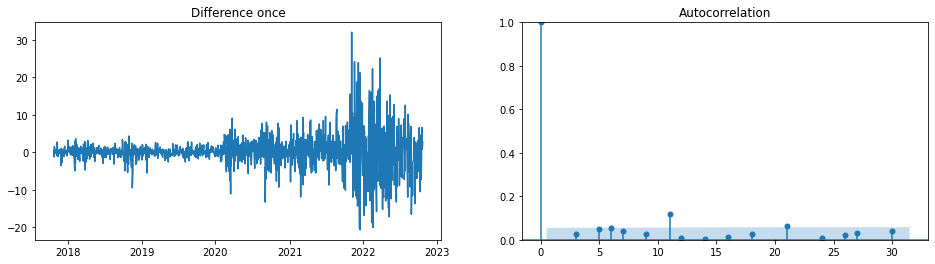

<IPython.core.display.Javascript object>

In [14]:
diff = df.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2)

Choose q = 5 

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(11, 1, 5))
result = model.fit()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters 

<IPython.core.display.Javascript object>

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1259
Model:                ARIMA(11, 1, 5)   Log Likelihood               -3674.322
Date:                Sat, 22 Oct 2022   AIC                           7382.645
Time:                        20:36:52   BIC                           7469.978
Sample:                             0   HQIC                          7415.466
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1520      0.208      0.731      0.465      -0.255       0.559
ar.L2          0.6492      0.081      8.060      0.000       0.491       0.807
ar.L3         -0.3809      0.143     -2.664      0.008      -0.661      -0.101
ar.L4         -0.6948      0.052    -13.252      0.000      -0.798      -0.592
ar.L5          0.4836      0.180      2.690      0.007       0.131       0.836
ar.L6          0.0810      0.022      3.752      0.000       0.039       0.123
ar.L7         -0.0140      0.031     -0.445      0.656      -0.075       0.048
ar.L8         -0.0934      0.020     -4.587      0.000      -0.133      -0.054
ar.L9          0.1266      0.033      3.893      0.000       0.063       0.190
ar.L10         0.0434      0.032      1.347      0.178      -0.020       0.107
ar.L11         0.0161      0.031      0.516      0.606      -0.045       0.077
ma.L1         -0.1855      0.207     -0.898      0.369      -0.590       0.219
ma.L2         -0.6829      0.074     -9.290      0.000      -0.827      -0.539
ma.L3          0.4383      0.150      2.913      0.004       0.143       0.733
ma.L4          0.6749      0.052     13.019      0.000       0.573       0.777
ma.L5         -0.4928      0.178     -2.766      0.006      -0.842      -0.144
sigma2        20.4315      0.436     46.902      0.000      19.578      21.285
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2812.34
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              23.21   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Date'>

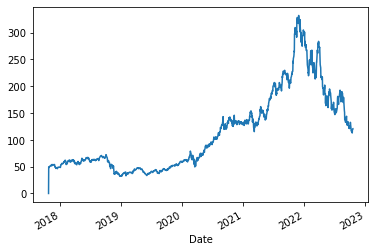

<IPython.core.display.Javascript object>

In [17]:
result.predict().plot()

In [18]:
fc = result.forecast(10)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<IPython.core.display.Javascript object>

In [23]:
fc

1259    123.905199
1260    122.533460
1261    123.598362
1262    122.659989
1263    124.286829
1264    124.498070
1265    124.555174
1266    125.123892
1267    124.178872
1268    125.105479
Name: predicted_mean, dtype: float64

<IPython.core.display.Javascript object>